In [2]:
from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


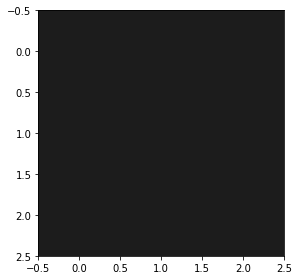

In [3]:
def box_kernel(size):
  return np.ones((size, size))/(size**2)

kernel = box_kernel(3)
print(kernel)
io.imshow(kernel)

In [ ]:
def plot_kernel(kernel, cmap='Reds'):
  plt.imshow(kernel, cmap = cmap)
  plt.colorbar()
  plt.show()
  print('Kernel shape: ', kernel.shape)

In [ ]:
def gaussian_kernel(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)

  X, Y = np.meshgrid(x, y, sparse = True)
  gaussian = np.exp(-((X-size//2)**2+(Y-size//2)**2)/(2*(sigma**2)))
  gaussian = gaussian/(2*np.pi*(sigma**2))

  return gaussian

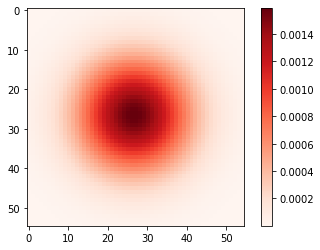

Kernel shape:  (55, 55)


In [ ]:
kernel = gaussian_kernel(55, 10)
plot_kernel(kernel)

In [ ]:
from numpy import pad

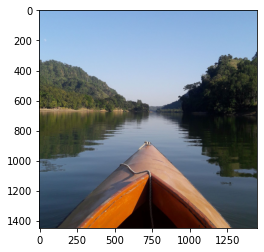

In [ ]:
image = io.imread('/content/kayak.jpg')
plt.imshow(image)

In [ ]:
pad_width = 200

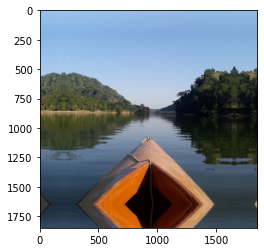

In [ ]:
img_padded = pad(image, pad_width=[(pad_width,pad_width), (pad_width,pad_width), (0,0)], mode='reflect')
plt.imshow(img_padded, cmap='gray')

In [ ]:
from skimage.color import rgb2gray
image = rgb2gray(image)

In [ ]:
# zero_padding
kernel_size = 55
kernel = gaussian_kernel(kernel_size, 50)

pad_width = int((kernel_size-1)/2)
img_padded = pad(image, pad_width=[(pad_width,pad_width), (pad_width,pad_width)], mode='constant', constant_values=0)

In [ ]:
img_padded.shape

(1502, 1502)

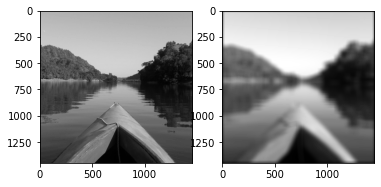

In [ ]:
from scipy import signal
filtered_img = signal.correlate(img_padded, kernel, mode='valid', method='auto')
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

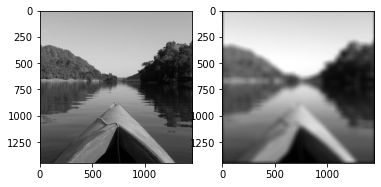

In [ ]:
# zero_padding
kernel_size = 55
kernel = box_kernel(kernel_size)

pad_width = int((kernel_size-1)/2)
img_padded = pad(image, pad_width=[(pad_width,pad_width), (pad_width,pad_width)], mode='constant', constant_values=0)

filtered_img = signal.correlate(img_padded, kernel, mode='valid', method='auto')
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

In [ ]:
from skimage.filters import median
img_filtered_median = median(filtered_img, selem=None, mode='nearest', cval=2.0, behavior='ndimage')

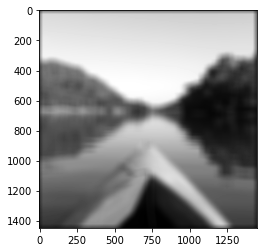

In [ ]:
plt.imshow(img_filtered_median, cmap='gray')